#Project overview

Remember Howie from Howie's Hotels in a previous lesson?

**He's currently under investigation by the FBI.**

Turns out he's been cooking the books—making up records for hotel stays that never happened—in order to launder money from his illegal endangered baby rhino smuggling operation.

Howie, how could you?

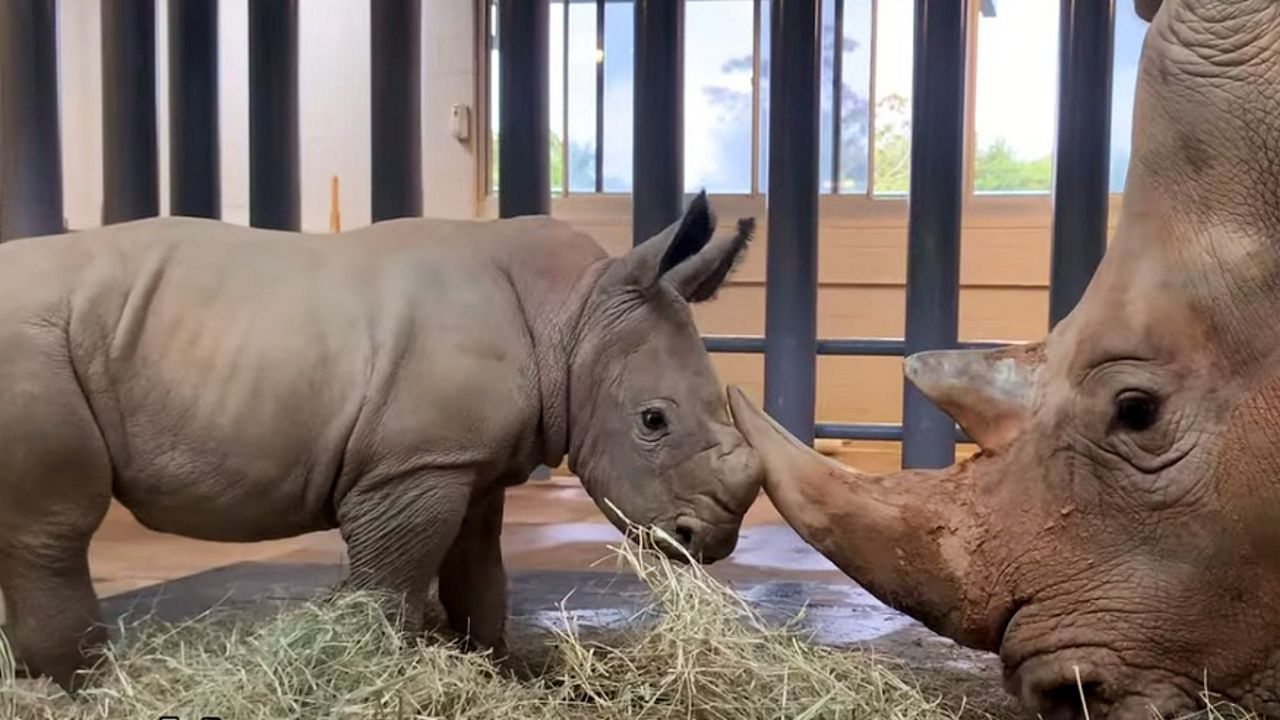


[MyNews13](https://www.mynews13.com/fl/orlando/attractions/2021/01/12/baby-rhino-at-disneys-animal-kingdom-given-name) (accessed 7/19/2021)



#Goal

The FBI has seized Howie's records as part of the investigation and stored them in the hotel_evidence.csv file.  You may work in groups to use your data-wrangling skills to find the 10 falsified records in Howie's database and determine how much endangered baby rhino money he has laundered.



#Tools
You'll be using data-wrangling techniques and functions like:
* `df.value_counts()`
* `df.describe()`
* `df.loc()`
* `plt.boxplot()`
* `pd.crosstab()`

#Evaluation – Rubric
TBD
#Submission Instructions 
You will submit this completed .ipynb file along with your evidence summary in Canvas.
#Due Date 
TBD


#Step 1: Download and save the `hotel_evidence.csv` dataset from the class materials.

* Make a note of where you saved the file on your computer.

#Step 2: Upload the hotel_evidence.csv dataset by running the following code block. 

* When prompted, navigate to and select the `hotel_evidence.csv` dataset where you saved it on your computer.

In [1]:
#Step 2

# from google.colab import files
# hotel_evidence = files.upload()

#Step 3: Import necessary packages.
  * Import `pandas` as `pd`
  * import `matplotlib.pyplot` as `plt`


In [2]:
#Step 3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Step 4: Create a Pandas DataFrame from the CSV file.
* Name the DataFrame `hotel_evidence`.
* Print the first five observations of `hotel_evidence`.  Note the kinds of data it contains.

In [3]:
#Step 4
hotel_evidence = pd.read_csv('hotel_evidence.csv')

hotel_evidence.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,booking_number,total_charges
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,7/1/15,1000000.0,0.0
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,7/1/15,1000001.0,0.0
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,7/2/15,1000002.0,75.0
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,7/2/15,1000003.0,75.0
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,...,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,7/3/15,1000004.0,196.0


In [4]:
hotel_evidence.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,booking_number,total_charges
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119385.000000,119389.000000,...,119389.000000,119389.000000,103050.000000,6797.000000,119389.000000,119389.000000,119389.000000,119389.000000,1.193890e+05,119390.000000
mean,0.370419,104.012187,2016.156564,27.165384,15.798340,0.927573,2.500147,1.856385,0.103874,0.007949,...,0.137098,0.221109,86.693382,189.266735,2.321169,101.830752,0.062510,0.571368,1.059769e+06,358.684189
std,0.482919,106.863213,0.707471,13.605753,8.780905,0.998578,1.907709,0.579288,0.398525,0.097437,...,1.497443,0.652288,110.774548,131.655015,17.594793,50.535840,0.245277,0.792800,4.309612e+04,442.705141
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,1.000000e+06,-63.800000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,1.029848e+06,146.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,179.000000,0.000000,94.560000,0.000000,0.000000,1.059695e+06,267.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,1.089542e+06,446.315000
max,1.000000,737.000000,2017.000000,75.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,9.999999e+06,100000.000000


In [5]:
hotel_evidence.shape

(119390, 34)

In [6]:
hotel_evidence.dtypes

hotel                              object
is_canceled                       float64
lead_time                         float64
arrival_date_year                 float64
arrival_date_month                 object
arrival_date_week_number          float64
arrival_date_day_of_month         float64
stays_in_weekend_nights           float64
stays_in_week_nights              float64
adults                            float64
children                          float64
babies                            float64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                 float64
previous_cancellations            float64
previous_bookings_not_canceled    float64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                   float64
deposit_type                       object
agent                             

In [7]:
hotel_evidence.isna().sum()

hotel                                  1
is_canceled                            1
lead_time                              1
arrival_date_year                      1
arrival_date_month                     1
arrival_date_week_number               1
arrival_date_day_of_month              1
stays_in_weekend_nights                1
stays_in_week_nights                   1
adults                                 1
children                               5
babies                                 1
meal                                   1
country                              489
market_segment                         1
distribution_channel                   1
is_repeated_guest                      1
previous_cancellations                 1
previous_bookings_not_canceled         1
reserved_room_type                     1
assigned_room_type                     1
booking_changes                        1
deposit_type                           1
agent                              16340
company         

#Step 5: Set up an indicator variable to identify the falsified records.
* Create a new variable in the `hotel_evidence` DataFrame called `is_false`.
* Assign `is_false` to be `0` for every record in the DataFrame.
* Later, when we discover a falsified record, we will change the value of `is_false` to `1` for that record.
* If you run `hotel_evidence['is_false'].describe()`, your results should look like this: 
```
count    119390.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: is_false, dtype: float64
```

In [8]:
#Step 5
false = 0
true = 1
hotel_evidence['is_false'] = false 
hotel_evidence['is_false'].describe()


count    119390.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: is_false, dtype: float64

#Step 6: Investigate the hotel booking numbers.
* [Benford's Law](https://www.statisticshowto.com/benfords-law/) tells us that in a group of numbers (such as record numbers or numbers on forms), the leading digit is most likely to be 1, followed by 2, then 3, then 4, etc.
* We should be suspicious of any records we observe that don't fit that pattern (and in fact, [forgers really are caught that way](https://www.journalofaccountancy.com/issues/2017/apr/excel-and-benfords-law-to-detect-fraud.html)). 
* Examine the distribution of `hotel_evidence['booking_number']` and determine the record that doesn't fit the pattern of the numbering system
* You could use `.describe()`, `.value_counts()`, create a boxplot or histogram, or choose your own function.




In [9]:
#Step 6
hotel_evidence['booking_number'].describe()

count    1.193890e+05
mean     1.059769e+06
std      4.309612e+04
min      1.000000e+06
25%      1.029848e+06
50%      1.059695e+06
75%      1.089542e+06
max      9.999999e+06
Name: booking_number, dtype: float64

In [10]:
hotel_evidence['booking_number'].value_counts()

1000000.0    1
1079590.0    1
1079602.0    1
1079601.0    1
1079600.0    1
            ..
1039793.0    1
1039792.0    1
1039791.0    1
1039790.0    1
1119389.0    1
Name: booking_number, Length: 119389, dtype: int64

In [11]:
hotel_evidence['booking_number'].tail()

119385    9999999.0
119386    1119386.0
119387    1119387.0
119388    1119388.0
119389    1119389.0
Name: booking_number, dtype: float64

count    1.193890e+05
mean     1.059769e+06
std      4.309612e+04
min      1.000000e+06
25%      1.029848e+06
50%      1.059695e+06
75%      1.089542e+06
max      9.999999e+06
Name: booking_number, dtype: float64

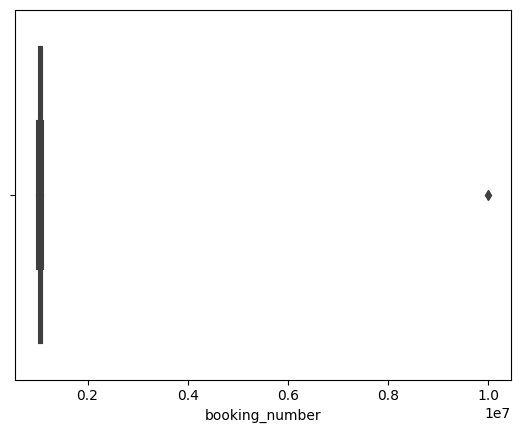

In [12]:
# create a boxplot or historgram, or choose your own function.
sns.boxplot(data = hotel_evidence, x = 'booking_number')
hotel_evidence['booking_number'].describe()

<AxesSubplot: ylabel='Frequency'>

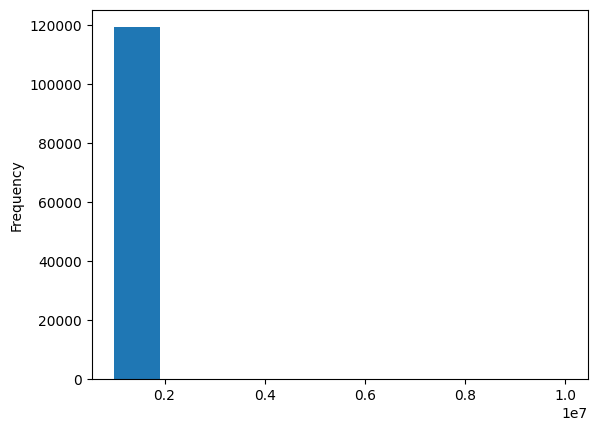

In [13]:
hotel_evidence.booking_number.plot(kind='hist')

<AxesSubplot: ylabel='Frequency'>

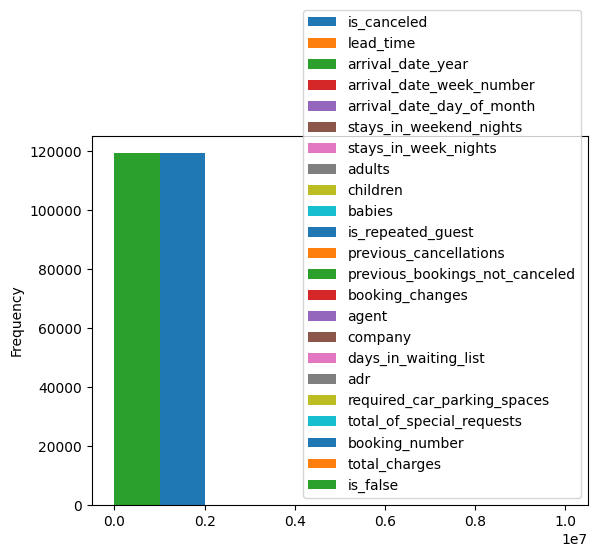

In [14]:
hotel_evidence[hotel_evidence.booking_number<=9999999].plot(kind='hist')

count    119389.000000
mean         27.165384
std          13.605753
min           1.000000
25%          16.000000
50%          28.000000
75%          38.000000
max          75.000000
Name: arrival_date_week_number, dtype: float64

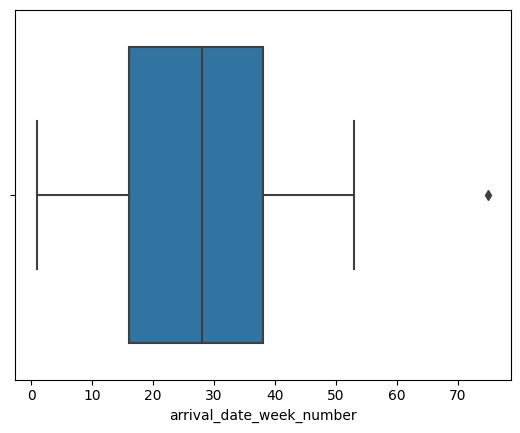

In [15]:
# plot chart for the arrival_date_week_number
sns.boxplot(data = hotel_evidence, x = 'arrival_date_week_number')
hotel_evidence['arrival_date_week_number'].describe()

#Step 7: Identify the record with the falsified booking number.
* Run the code below to use the [`.loc` function](https://datatofish.com/if-condition-in-pandas-dataframe/) to identify the record with the falsified booking number (this will serve as a template for identifying later records). 
* This will change the value of the `is_falsified` indicator to `1` for this record.
* You are welcome to use a different method of your choice to identify the record and change `is_falsified` to `1`.

In [16]:
#Step 7
hotel_evidence.loc[hotel_evidence['booking_number'] > 9000000.0] #, ['is_false']] = true
hotel_evidence

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,booking_number,total_charges,is_false
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,0.0,Transient,0.00,0.0,0.0,Check-Out,7/1/15,1000000.0,0.00,0
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,0.0,Transient,0.00,0.0,0.0,Check-Out,7/1/15,1000001.0,0.00,0
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,0.0,Transient,75.00,0.0,0.0,Check-Out,7/2/15,1000002.0,75.00,0
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,0.0,Transient,75.00,0.0,0.0,Check-Out,7/2/15,1000003.0,75.00,0
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,...,0.0,Transient,98.00,0.0,1.0,Check-Out,7/3/15,1000004.0,196.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0.0,23.0,2017.0,August,35.0,30.0,2.0,5.0,2.0,...,0.0,Transient,96.14,0.0,0.0,Check-Out,9/6/17,9999999.0,672.98,0
119386,City Hotel,0.0,102.0,2017.0,August,35.0,31.0,2.0,5.0,3.0,...,0.0,Transient,225.43,0.0,2.0,Check-Out,9/7/17,1119386.0,100000.00,0
119387,City Hotel,0.0,34.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,0.0,Transient,157.71,0.0,4.0,Check-Out,9/7/17,1119387.0,1103.97,0
119388,City Hotel,0.0,109.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,0.0,Transient,104.40,0.0,0.0,Check-Out,9/7/17,1119388.0,730.80,0


#Step 8: Checking dates—how many weeks are in a year?
* Take a close look at `arrival_date_week_number`.  Does anything look suspicious here?  You can use `.describe()`, `.value_counts()` or any other method of your choice.
* Identify the falsified record and change the value of `is_falsified` to `1`.


In [17]:
#Step 8
hotel_evidence['arrival_date_week_number'].describe()

count    119389.000000
mean         27.165384
std          13.605753
min           1.000000
25%          16.000000
50%          28.000000
75%          38.000000
max          75.000000
Name: arrival_date_week_number, dtype: float64

In [18]:
hotel_evidence['arrival_date_week_number'].value_counts()

33.0    3580
30.0    3087
32.0    3045
34.0    3040
18.0    2926
21.0    2854
28.0    2852
17.0    2805
20.0    2785
29.0    2763
42.0    2756
31.0    2741
41.0    2699
15.0    2689
27.0    2664
25.0    2663
38.0    2661
23.0    2621
35.0    2593
39.0    2581
22.0    2546
24.0    2498
13.0    2416
16.0    2405
19.0    2402
40.0    2397
26.0    2391
43.0    2352
44.0    2272
14.0    2264
37.0    2229
8.0     2216
36.0    2167
10.0    2149
9.0     2117
7.0     2109
12.0    2083
11.0    2070
45.0    1941
53.0    1816
49.0    1781
47.0    1685
46.0    1574
6.0     1508
50.0    1505
48.0    1504
4.0     1487
5.0     1387
3.0     1319
2.0     1218
52.0    1195
1.0     1047
51.0     933
75.0       1
Name: arrival_date_week_number, dtype: int64

In [19]:
hotel_evidence.loc[hotel_evidence['arrival_date_week_number'] > 53.0, 'is_false'] = true


#Step 9: 30 days hath September...
* Take a close look at `arrival_date_day_of_month`.  Does anything look suspicious here?  Probably not yet...
* Now look at the distribution of dates by month.  You could use  [`pd.crosstab.()`](https://pbpython.com/pandas-crosstab.html).  Scroll to the bottom.  Anything suspicious here?
* Identify the falsified record and change the value of `is_falsified` to `1`.  You may want to review [this article](https://datatofish.com/if-condition-in-pandas-dataframe/) for help incorporating two conditions into your `.loc` statement.



In [20]:
#Step 9
hotel_evidence['arrival_date_day_of_month'].head(10)

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: arrival_date_day_of_month, dtype: float64

In [21]:
hotel_evidence['arrival_date_day_of_month'].value_counts()

17.0    4406
5.0     4317
15.0    4196
25.0    4160
26.0    4146
9.0     4095
12.0    4087
16.0    4078
2.0     4055
19.0    4052
20.0    4032
18.0    4002
24.0    3993
28.0    3946
8.0     3921
3.0     3855
30.0    3853
6.0     3833
14.0    3819
27.0    3802
21.0    3767
4.0     3763
13.0    3745
7.0     3665
1.0     3626
23.0    3616
11.0    3599
22.0    3596
29.0    3580
10.0    3575
31.0    2209
Name: arrival_date_day_of_month, dtype: int64

In [22]:
arrive_day = hotel_evidence['arrival_date_day_of_month']
arrive_month = hotel_evidence['arrival_date_month']
# used the pd.crosstab to look at the distribution of dates by month
pd.crosstab(arrive_month, arrive_day).sort_values(by = 'arrival_date_month')
# February date seems wrong with the 31 days.

arrival_date_day_of_month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0
arrival_date_month,,,,,,,,,,,,,,,,,,,,,
April,236,198,331,336,367,466,324,382,502,306,...,486,340,298,260,443,376,553,596,362,0
August,502,337,503,389,460,381,472,555,351,493,...,424,321,459,486,458,415,462,398,322,377
December,231,257,272,210,590,158,146,431,268,180,...,197,190,214,140,276,338,249,318,476,199
February,215,200,206,259,217,327,207,159,221,266,...,278,238,256,470,429,344,296,96,0,1
January,172,362,186,173,145,161,132,169,131,145,...,223,242,123,270,183,305,197,157,169,107
July,479,373,348,432,300,457,409,355,431,343,...,458,483,406,518,323,470,356,367,442,365
June,361,520,416,297,281,368,294,537,446,334,...,282,327,440,260,413,386,357,254,376,0
March,267,495,245,300,315,224,277,214,353,283,...,247,274,487,369,233,288,257,273,345,451
May,296,437,306,396,531,349,285,369,388,311,...,328,294,487,416,457,229,322,330,427,371


In [23]:
hotel_evidence.loc[(hotel_evidence['arrival_date_month'] == 'February') & (hotel_evidence['arrival_date_day_of_month'] > 29), 'is_false'] = true

#Step 10: Unaccompanied Minors 
* Howie wouldn't let a bunch of unaccompanied babies book a stay, would he?
* Use `pd.crosstab.()` or another method of your choice to see if any children or babies booked a stay without adults.
* Identify the falsified record and change the value of `is_falsified` to `1`. 

In [24]:
#Step 10
adults = hotel_evidence['adults']
children = hotel_evidence['children'] 
babies = hotel_evidence['babies']
hotel_evidence['minors'] = children + babies
minors = hotel_evidence['minors']
# display(minors)
pd.crosstab(adults, minors)
# adding the children and babies together

minors,0.0,1.0,2.0,3.0,9.0,10.0
adults,,,,,,
0.0,180,4,205,14,0,1
1.0,22577,286,157,6,1,0
2.0,81557,4658,3368,91,0,1
3.0,5665,495,41,0,0,0
4.0,59,3,0,0,0,0
5.0,2,0,0,0,0,0
6.0,1,0,0,0,0,0
10.0,1,0,0,0,0,0
20.0,2,0,0,0,0,0


#Step 11: Eight Days a Week
* All of these records are *supposed to* document stays of consecutive days.  So if someone stayed for six weekdays, they should have stayed for at least two weekend days.  If someone stayed for 3 or more weekend days, there ought to be some weekdays in there, too.
* Use `pd.crosstab.()` or another method of your choice to find the **two** records that don't fit this pattern.
* Identify the two falsified records and change the value of `is_falsified` for both to `1`. 

In [25]:
#Step 11
weekday = hotel_evidence['stays_in_week_nights']
weekend = hotel_evidence['stays_in_weekend_nights']
pd.crosstab(weekday, weekend)

stays_in_weekend_nights,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,12.0,13.0,14.0,16.0,18.0,19.0
stays_in_week_nights,,,,,,,,,,,,,,,,,
0.0,715,4569,2361,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1.0,16451,7326,6533,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2.0,17955,8979,6749,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3.0,11564,6152,4542,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.0,4482,2412,2669,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5.0,830,1188,8655,310,94,0,0,0,0,0,0,0,0,0,0,0,0
6.0,0,0,851,301,347,0,0,0,0,0,0,0,0,0,0,0,0
7.0,0,0,446,399,184,0,0,0,0,0,0,0,0,0,0,0,0
8.0,0,0,393,131,132,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
hotel_evidence.loc[((hotel_evidence['stays_in_week_nights'] == 0) & (hotel_evidence['stays_in_week_nights'] == 8.0)) | ((hotel_evidence['stays_in_weekend_nights'] == 11.0) & (hotel_evidence['stays_in_weekend_nights'] == 0)), 'is_false'] = 1
hotel_evidence.loc[hotel_evidence['is_false'] == 1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,booking_number,total_charges,is_false,minors
19085,Resort Hotel,0.0,11.0,2015.0,December,75.0,5.0,2.0,1.0,2.0,...,Transient-Party,68.0,0.0,0.0,Check-Out,12/8/15,1019085.0,204.0,1,0.0
106962,City Hotel,0.0,9.0,2017.0,February,9.0,31.0,2.0,5.0,1.0,...,Transient,74.8,0.0,0.0,Check-Out,3/5/17,1106962.0,523.6,1,0.0


In [27]:
hotel_evidence.loc[((hotel_evidence['adults'] == 0) & (hotel_evidence['minors'] > 0)), 'is_false'] = true

In [28]:
hotel_evidence.loc[(hotel_evidence['is_false']) == true]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,booking_number,total_charges,is_false,minors
19085,Resort Hotel,0.0,11.0,2015.0,December,75.0,5.0,2.0,1.0,2.0,...,Transient-Party,68.00,0.0,0.0,Check-Out,12/8/15,1019085.0,204.00,1,0.0
40984,City Hotel,0.0,1.0,2015.0,August,33.0,10.0,1.0,1.0,0.0,...,Transient-Party,9.00,0.0,0.0,Check-Out,8/12/15,1040984.0,18.00,1,3.0
41048,City Hotel,0.0,104.0,2015.0,August,33.0,11.0,0.0,3.0,0.0,...,Transient-Party,6.00,0.0,2.0,Check-Out,8/14/15,1041048.0,18.00,1,2.0
41446,City Hotel,0.0,3.0,2015.0,August,34.0,16.0,2.0,0.0,0.0,...,Transient-Party,6.00,0.0,1.0,Check-Out,8/18/15,1041446.0,12.00,1,2.0
41952,City Hotel,0.0,15.0,2015.0,August,35.0,28.0,0.0,1.0,0.0,...,Transient,0.00,0.0,1.0,Check-Out,8/29/15,1041952.0,0.00,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0.0,296.0,2017.0,July,30.0,27.0,1.0,3.0,0.0,...,Transient,98.85,0.0,1.0,Check-Out,7/31/17,1117204.0,395.40,1,2.0
117274,City Hotel,0.0,276.0,2017.0,July,31.0,30.0,2.0,1.0,0.0,...,Transient,93.64,0.0,2.0,Check-Out,8/2/17,1117274.0,280.92,1,2.0
117303,City Hotel,0.0,291.0,2017.0,July,30.0,29.0,2.0,2.0,0.0,...,Transient,98.85,0.0,1.0,Check-Out,8/2/17,1117303.0,395.40,1,2.0
117453,City Hotel,0.0,159.0,2017.0,July,31.0,31.0,1.0,3.0,0.0,...,Transient,121.88,0.0,1.0,Check-Out,8/4/17,1117453.0,487.52,1,2.0


#Step 12: Money, money, money
* The `total_charges` column *should be* equal to the average daily rate (`adr`) times (`stays_in_weekend_nights` + `stays_in_week_nights`).  There are five(!) records where this isn't the case.
* Identify these five records and change the value of `is_falsified` to `1` for each.
* You may use any strategy you like or follow the guided steps in the code block below.



In [29]:
#Step 12

#Re-calculate total charges by multiplying adr * (weeknight stays + weekend stays)
#We'll round our answer to two decimals.  Sometimes when try to compare unrounded calculations
#in Python, Python will "think" they are unequal when they aren't.  You can try repeating the exercise
#without rounding to see what happens

hotel_evidence['check'] = round(hotel_evidence['adr']* (hotel_evidence['stays_in_week_nights'] + hotel_evidence['stays_in_weekend_nights']),2)

#Round the total charges variable as well

hotel_evidence['total_charges_rounded'] = round(hotel_evidence['total_charges'],2)

#Print the 5 records where the calculated charges don't match what is recorded in the spreadsheet
print(hotel_evidence[hotel_evidence['check'] != hotel_evidence['total_charges_rounded']])

#Identify the records 
hotel_evidence.loc[ hotel_evidence['check'] != hotel_evidence['total_charges_rounded'], ['is_false']] = 1


               hotel  is_canceled  lead_time  arrival_date_year  \
232              NaN          NaN        NaN                NaN   
35213   Resort Hotel          0.0       11.0             2017.0   
112930    City Hotel          0.0      223.0             2017.0   
118963    City Hotel          0.0        1.0             2017.0   
119386    City Hotel          0.0      102.0             2017.0   

       arrival_date_month  arrival_date_week_number  \
232                   NaN                       NaN   
35213               April                      15.0   
112930                May                      20.0   
118963             August                      35.0   
119386             August                      35.0   

        arrival_date_day_of_month  stays_in_weekend_nights  \
232                           NaN                      NaN   
35213                        11.0                      0.0   
112930                       16.0                      0.0   
118963            

#Step 13: Case closed 
* Create a subset of `hotel_evidence` that only includes records where `is_falsified = 1`.  Name this subset `false_records`.
* Add up all the `total_charges` (the one given in `hotel_evidence`, not the one we calculated in the last step) to see how much endangered baby rhino money Howie laundered. 

In [30]:
#Step 13
false_records = hotel_evidence.loc[(hotel_evidence['is_false']) == 1]
false_records


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,booking_number,total_charges,is_false,minors,check,total_charges_rounded
232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,292.00,1,NaN,NaN,292.00
19085,Resort Hotel,0.0,11.0,2015.0,December,75.0,5.0,2.0,1.0,2.0,...,0.0,0.0,Check-Out,12/8/15,1019085.0,204.00,1,0.0,204.00,204.00
35213,Resort Hotel,0.0,11.0,2017.0,April,15.0,11.0,0.0,5.0,2.0,...,0.0,1.0,Check-Out,4/16/17,1035213.0,1000.00,1,0.0,414.25,1000.00
40984,City Hotel,0.0,1.0,2015.0,August,33.0,10.0,1.0,1.0,0.0,...,0.0,0.0,Check-Out,8/12/15,1040984.0,18.00,1,3.0,18.00,18.00
41048,City Hotel,0.0,104.0,2015.0,August,33.0,11.0,0.0,3.0,0.0,...,0.0,2.0,Check-Out,8/14/15,1041048.0,18.00,1,2.0,18.00,18.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117303,City Hotel,0.0,291.0,2017.0,July,30.0,29.0,2.0,2.0,0.0,...,0.0,1.0,Check-Out,8/2/17,1117303.0,395.40,1,2.0,395.40,395.40
117453,City Hotel,0.0,159.0,2017.0,July,31.0,31.0,1.0,3.0,0.0,...,0.0,1.0,Check-Out,8/4/17,1117453.0,487.52,1,2.0,487.52,487.52
118200,City Hotel,0.0,10.0,2017.0,August,32.0,12.0,2.0,2.0,0.0,...,0.0,1.0,Check-Out,8/16/17,1118200.0,24.00,1,3.0,24.00,24.00
118963,City Hotel,0.0,1.0,2017.0,August,35.0,27.0,0.0,0.0,2.0,...,0.0,0.0,Check-Out,8/27/17,1118963.0,800.00,1,0.0,0.00,800.00


In [31]:
hotel_evidence['total_charges'].sum()

42823305.27

In [32]:
false_records['total_charges_rounded'].sum()

168809.25

#Step 14: Evidence
* Compile your evidence for a jury.  Create a table or other summary that includes the booking number for each falsified record as well as the evidence you found to show that the record was falsified. 
* Make sure to include the total amount of endangered baby rhino money that Howie laundered.